In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 50

In [94]:
file1 = pd.read_csv('file1.csv')
file2 = pd.read_csv('file2.csv')
file3 = pd.read_csv('file3.csv')

## Aggregating data into one Data Frame using Pandas.

In [95]:
file1.rename(columns={'ST':'State', 'GENDER': 'Gender'}, inplace=True)

In [96]:
file2.rename(columns={'ST':'State', 'GENDER': 'Gender'}, inplace=True)

In [97]:
def load_original_data():
    return pd.concat([file1,file2,file3], axis=0)

In [98]:
CA_df=load_original_data()

In [99]:
CA_df

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [100]:
def lower_case_column_names(CA_df):
    CA_df.columns=[i.lower() for i in CA_df.columns]
    return CA_df

In [101]:
lower_case_column_names(CA_df)

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [102]:
def drop_columns(CA_df) :
    CA_df.drop(columns=["customer"], inplace=True)
    return CA_df

In [103]:
drop_columns(CA_df)

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [104]:
list(CA_df.columns)

['state',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

In [105]:
CA_df = CA_df[['customer lifetime value','education','gender','income','monthly premium auto',
 'number of open complaints',
 'policy type','state','total claim amount', 'vehicle class']]
CA_df.head()

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,697953.59%,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,1288743.17%,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,764586.18%,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,536307.65%,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car


In [106]:
CA_df['customer lifetime value']=CA_df['customer lifetime value'].astype('string')

In [107]:
CA_df['customer lifetime value']=CA_df['customer lifetime value'].str.rstrip("%")

In [108]:
CA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    9130 non-null   string 
 1   education                  9137 non-null   object 
 2   gender                     9015 non-null   object 
 3   income                     9137 non-null   float64
 4   monthly premium auto       9137 non-null   float64
 5   number of open complaints  9137 non-null   object 
 6   policy type                9137 non-null   object 
 7   state                      9137 non-null   object 
 8   total claim amount         9137 non-null   float64
 9   vehicle class              9137 non-null   object 
dtypes: float64(3), object(6), string(1)
memory usage: 1.0+ MB


Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of open complaints ). Hint: remove the percentage from the customer lifetime value and truncate it to an integer value.

In [109]:
CA_df

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,<NA>,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,697953.59,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,1288743.17,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,764586.18,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,536307.65,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
7065,23405.98798,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
7066,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
7067,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
7068,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [110]:
CA_df.dtypes

customer lifetime value       string
education                     object
gender                        object
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
state                         object
total claim amount           float64
vehicle class                 object
dtype: object

In [111]:
CA_df

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,<NA>,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,697953.59,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,1288743.17,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,764586.18,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,536307.65,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
7065,23405.98798,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
7066,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
7067,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
7068,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [112]:
CA_df['customer lifetime value'].unique()

<StringArray>
[         <NA>,   '697953.59',  '1288743.17',   '764586.18',   '536307.65',
   '825629.78',   '538089.86',   '721610.03',  '2412750.40',   '738817.81',
 ...
 '4140.648654',  '16261.5855',   '19872.262', '4628.995325', '5032.165498',
 '4100.398533', '23405.98798', '8163.890428', '7524.442436', '2611.836866']
Length: 8212, dtype: string

In [113]:
CA_df['customer lifetime value'].isna()

0        True
1       False
2       False
3       False
4       False
        ...  
7065    False
7066    False
7067    False
7068    False
7069    False
Name: customer lifetime value, Length: 12074, dtype: bool

In [114]:
len(CA_df[CA_df['customer lifetime value'].isna() ==True])

2944

In [115]:
CA_df['number of open complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan, 0,
       2, 3, 1, 5, 4], dtype=object)

In [116]:
CA_df

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,<NA>,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,697953.59,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,1288743.17,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,764586.18,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,536307.65,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
7065,23405.98798,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
7066,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
7067,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
7068,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [117]:
CA_df['number of open complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan, 0,
       2, 3, 1, 5, 4], dtype=object)

In [118]:
CA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    9130 non-null   string 
 1   education                  9137 non-null   object 
 2   gender                     9015 non-null   object 
 3   income                     9137 non-null   float64
 4   monthly premium auto       9137 non-null   float64
 5   number of open complaints  9137 non-null   object 
 6   policy type                9137 non-null   object 
 7   state                      9137 non-null   object 
 8   total claim amount         9137 non-null   float64
 9   vehicle class              9137 non-null   object 
dtypes: float64(3), object(6), string(1)
memory usage: 1.0+ MB


In [119]:
CA_df['number of open complaints']=CA_df['number of open complaints'].astype('string')

In [120]:
CA_df['number of open complaints']=CA_df['number of open complaints'].str[:3].str[-1]

In [121]:
CA_df

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,<NA>,Master,NaN,0.0,1000.0,0,Personal Auto,Washington,2.704934,Four-Door Car
1,697953.59,Bachelor,F,0.0,94.0,0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,1288743.17,Bachelor,F,48767.0,108.0,0,Personal Auto,Nevada,566.472247,Two-Door Car
3,764586.18,Bachelor,M,0.0,106.0,0,Corporate Auto,California,529.881344,SUV
4,536307.65,High School or Below,M,36357.0,68.0,0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
7065,23405.98798,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
7066,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
7067,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
7068,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [122]:
CA_df['number of open complaints']=pd.to_numeric(CA_df['number of open complaints'])

In [123]:
CA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    9130 non-null   string 
 1   education                  9137 non-null   object 
 2   gender                     9015 non-null   object 
 3   income                     9137 non-null   float64
 4   monthly premium auto       9137 non-null   float64
 5   number of open complaints  9137 non-null   float64
 6   policy type                9137 non-null   object 
 7   state                      9137 non-null   object 
 8   total claim amount         9137 non-null   float64
 9   vehicle class              9137 non-null   object 
dtypes: float64(4), object(5), string(1)
memory usage: 1.0+ MB


In [124]:
CA_df['number of open complaints'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., nan])

In [125]:
CA_df.drop_duplicates()

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,<NA>,Master,NaN,0.0,1000.0,0.0,Personal Auto,Washington,2.704934,Four-Door Car
1,697953.59,Bachelor,F,0.0,94.0,0.0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,1288743.17,Bachelor,F,48767.0,108.0,0.0,Personal Auto,Nevada,566.472247,Two-Door Car
3,764586.18,Bachelor,M,0.0,106.0,0.0,Corporate Auto,California,529.881344,SUV
4,536307.65,High School or Below,M,36357.0,68.0,0.0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
7065,23405.98798,Bachelor,M,71941.0,73.0,0.0,Personal Auto,California,198.234764,Four-Door Car
7066,3096.511217,College,F,21604.0,79.0,0.0,Corporate Auto,California,379.200000,Four-Door Car
7067,8163.890428,Bachelor,M,0.0,85.0,3.0,Corporate Auto,California,790.784983,Four-Door Car
7068,7524.442436,College,M,21941.0,96.0,0.0,Personal Auto,California,691.200000,Four-Door Car


In [126]:
CA_df.gender.value_counts()

F         4560
M         4368
Male        40
female      30
Femal       17
Name: gender, dtype: int64

In [127]:
CA_gender_change = CA_df.replace({"Male": "M", "Female": "F", "female": "F", "Femal": "F"})

In [128]:
CA_gender_change

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,<NA>,Master,NaN,0.0,1000.0,0.0,Personal Auto,Washington,2.704934,Four-Door Car
1,697953.59,Bachelor,F,0.0,94.0,0.0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,1288743.17,Bachelor,F,48767.0,108.0,0.0,Personal Auto,Nevada,566.472247,Two-Door Car
3,764586.18,Bachelor,M,0.0,106.0,0.0,Corporate Auto,California,529.881344,SUV
4,536307.65,High School or Below,M,36357.0,68.0,0.0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
7065,23405.98798,Bachelor,M,71941.0,73.0,0.0,Personal Auto,California,198.234764,Four-Door Car
7066,3096.511217,College,F,21604.0,79.0,0.0,Corporate Auto,California,379.200000,Four-Door Car
7067,8163.890428,Bachelor,M,0.0,85.0,3.0,Corporate Auto,California,790.784983,Four-Door Car
7068,7524.442436,College,M,21941.0,96.0,0.0,Personal Auto,California,691.200000,Four-Door Car


In [129]:
CA_df.state.unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [130]:
CA_state_change=CA_df.replace({"AZ": "Arizona","Cali":"California","WA":"Washington"})


In [131]:
CA_state_change

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,<NA>,Master,NaN,0.0,1000.0,0.0,Personal Auto,Washington,2.704934,Four-Door Car
1,697953.59,Bachelor,F,0.0,94.0,0.0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,1288743.17,Bachelor,F,48767.0,108.0,0.0,Personal Auto,Nevada,566.472247,Two-Door Car
3,764586.18,Bachelor,M,0.0,106.0,0.0,Corporate Auto,California,529.881344,SUV
4,536307.65,High School or Below,M,36357.0,68.0,0.0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
7065,23405.98798,Bachelor,M,71941.0,73.0,0.0,Personal Auto,California,198.234764,Four-Door Car
7066,3096.511217,College,F,21604.0,79.0,0.0,Corporate Auto,California,379.200000,Four-Door Car
7067,8163.890428,Bachelor,M,0.0,85.0,3.0,Corporate Auto,California,790.784983,Four-Door Car
7068,7524.442436,College,M,21941.0,96.0,0.0,Personal Auto,California,691.200000,Four-Door Car


In [132]:
CA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    9130 non-null   string 
 1   education                  9137 non-null   object 
 2   gender                     9015 non-null   object 
 3   income                     9137 non-null   float64
 4   monthly premium auto       9137 non-null   float64
 5   number of open complaints  9137 non-null   float64
 6   policy type                9137 non-null   object 
 7   state                      9137 non-null   object 
 8   total claim amount         9137 non-null   float64
 9   vehicle class              9137 non-null   object 
dtypes: float64(4), object(5), string(1)
memory usage: 1.0+ MB


In [133]:
CA_df = CA_df[CA_df['income'].isna()==False]

In [134]:
CA_df.income.value_counts(0)

0.0        2294
95697.0      13
26876.0       8
61108.0       8
10621.0       8
           ... 
26599.0       1
75774.0       1
85412.0       1
42968.0       1
21941.0       1
Name: income, Length: 5655, dtype: int64

In [135]:
mean_income=CA_df["income"][CA_df["income"] > 0].mean()

In [136]:
mean_income

50510.29241560719

In [137]:
CA_df['income'].replace(0,mean_income)

0       50510.292416
1       50510.292416
2       48767.000000
3       50510.292416
4       36357.000000
            ...     
7065    71941.000000
7066    21604.000000
7067    50510.292416
7068    21941.000000
7069    50510.292416
Name: income, Length: 9137, dtype: float64

In [138]:
CA_df['monthly premium auto'].replace(0,mean_montly_premium_auto)

NameError: name 'mean_montly_premium_auto' is not defined

In [ ]:
CA_df['number of open complaints'].replace(0,mean_number_complaints)

In [ ]:
CA_df['total claim amount'].replace(0,mean_total_claim)

In [ ]:
CA_df['income'] = CA_df['income'].fillna(mean_income)

In [ ]:
CA_df['income'].isna().sum()

In [ ]:
CA_df = CA_df[CA_df['monthly premium auto'].isna()==False]

In [ ]:
mean_montly_premium_auto=CA_df["monthly premium auto"][CA_df["monthly premium auto"] > 0].mean()

In [ ]:
CA_df['monthly premium auto'] = CA_df['monthly premium auto'].fillna(mean_montly_premium_auto)

In [ ]:
CA_df['monthly premium auto'].isna().sum()

In [ ]:
CA_df = CA_df[CA_df['number of open complaints'].isna()==False]

In [ ]:
mean_number_complaints=CA_df["number of open complaints"][CA_df["number of open complaints"] > 0].mean()

In [ ]:
CA_df['number of open complaints'] = CA_df['number of open complaints'].fillna(mean_number_complaints)

In [ ]:
CA_df['number of open complaints'].isna().sum()

In [ ]:
CA_df = CA_df[CA_df['total claim amount'].isna()==False]

In [ ]:
mean_total_claim=CA_df['total claim amount'][CA_df['total claim amount'] > 0].mean()

In [ ]:
CA_df['total claim amount'] = CA_df['total claim amount'].fillna(mean_total_claim)

In [ ]:
CA_df['total claim amount'].isna().sum()

In [ ]:
CA_df['number of open complaints']._get_numeric_data()

In [ ]:
CA_df['number of open complaints'].astype(np.int64)

In [ ]:
CA_df.info()

In [ ]:
CA_df.income.mean()

Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central


In [ ]:
State_Zone=CA_df.replace({'California' : 'West Region', 'Oregon' : 'North West', 'Washington' : 'East', 'Arizona' : 'Central', 'Nevada' : 'Central'})

In [ ]:
State_Zone

In [ ]:
CA_df = CA_df.applymap(lambda s: s.lower() if type(s) == str else s)

In [ ]:
CA_df

In [ ]:
CA_df.info()

In [ ]:
CA_df.select_dtypes('object')

In [ ]:
CA_df.select_dtypes('float')

Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [147]:
x = np.arange(1,11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [148]:
y=2*x

In [149]:
y

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

No handles with labels found to put in legend.


Text(0, 0.5, 'y-dimension')

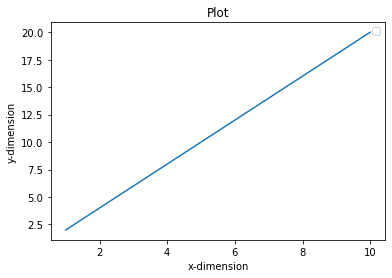

In [153]:
plt.figure()
plt.plot(x,y)
plt.title("Plot")
plt.legend()
plt.xlabel("x-dimension")
plt.ylabel("y-dimension")

Text(0.5, 0, 'this is a x label')

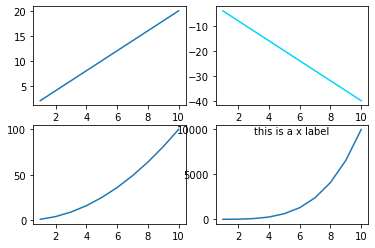

In [175]:
plt.subplot(2,2,1)
plt.plot(x,y)

plt.subplot(2,2,3)
y1=x**2
plt.plot(x,y1)

plt.subplot(2,2,4)
y2=x**4
plt.plot(x,y2)

plt.subplot(2,2,2)
y3=-4*x
plt.plot(x,y3, color="#00D5FF")
plt.xlabel("this is a x label")